# K- means clustering

### Imamhussain Naikwade

In [2]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
df_ml_cust = pd.read_csv("./Mall_Customers.csv")

In [4]:
df_ml_cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_ml_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df_ml_cust.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#droping all categorical variables
df_ml_cust.drop(['Gender'], axis =1,inplace = True)

In [8]:
df_ml_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [9]:
df_ml_cust.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [10]:
df_ml_cust.shape

(200, 4)

In [11]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
scaled_df = pd.DataFrame(mmsc.fit_transform(df_ml_cust),columns = ['CustomerID','Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [12]:
scaled_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.019231,0.000000,0.387755
1,0.005025,0.057692,0.000000,0.816327
2,0.010050,0.038462,0.008197,0.051020
3,0.015075,0.096154,0.008197,0.775510
4,0.020101,0.250000,0.016393,0.397959


In [15]:
#Calculating optimal K value using Elbow plot
from sklearn.cluster import KMeans
OMP_NUM_THREADS=1
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

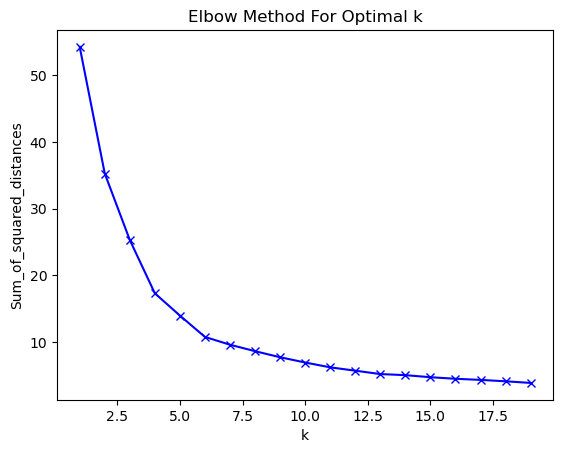

In [14]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
#importing module and applying Clustering to the scaled data
from sklearn.cluster import AgglomerativeClustering
agg_clust = AgglomerativeClustering(n_clusters=10,metric='euclidean',linkage='ward')
agg_clust.fit_predict(scaled_df)

array([8, 5, 8, 5, 8, 5, 8, 5, 2, 5, 2, 5, 2, 5, 8, 5, 8, 5, 2, 5, 8, 5,
       2, 5, 2, 5, 2, 3, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 6, 5, 2, 3,
       2, 5, 4, 3, 3, 3, 4, 3, 3, 6, 4, 4, 4, 6, 3, 4, 6, 3, 6, 6, 6, 3,
       4, 6, 3, 3, 6, 4, 6, 6, 6, 3, 4, 4, 3, 4, 6, 4, 6, 4, 3, 4, 6, 3,
       4, 4, 6, 9, 4, 4, 4, 9, 4, 9, 4, 9, 9, 4, 6, 9, 4, 9, 6, 4, 6, 6,
       6, 9, 4, 9, 9, 9, 6, 4, 4, 4, 9, 4, 0, 0, 9, 0, 7, 0, 7, 0, 7, 0,
       9, 0, 1, 0, 7, 0, 1, 0, 7, 0, 9, 0, 1, 0, 7, 0, 1, 0, 7, 0, 7, 0,
       7, 0, 1, 0, 1, 0, 7, 0, 1, 0, 7, 0, 1, 0, 1, 0, 1, 0, 1, 0, 7, 0,
       7, 0, 7, 0, 1, 0, 1, 0, 1, 0, 7, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

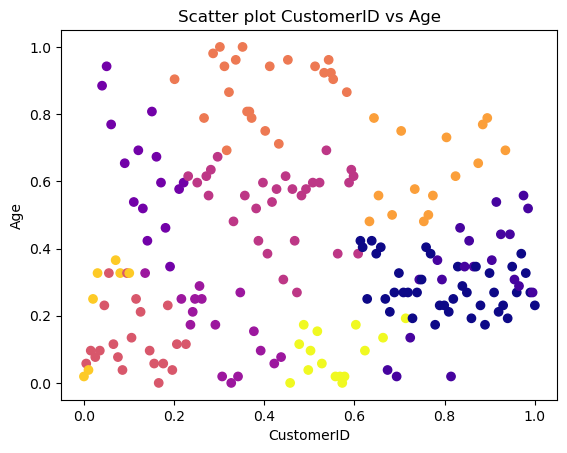

In [17]:
#Plotting
plt.title("Scatter plot CustomerID vs Age")
plt.scatter(scaled_df.iloc[:,0],scaled_df.iloc[:,1], c=agg_clust.labels_,cmap='plasma' )
plt.xlabel("CustomerID")
plt.ylabel("Age")
plt.show()

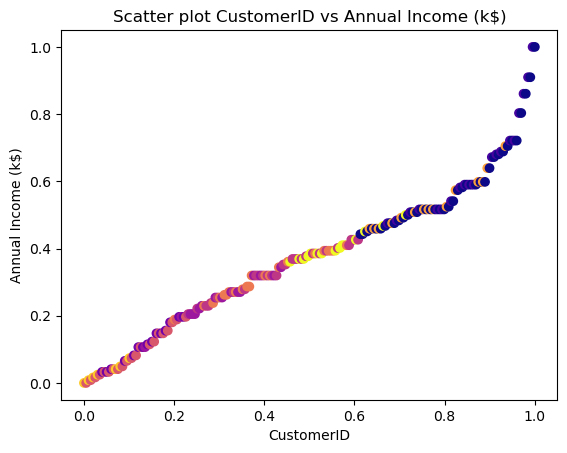

In [18]:
#Plotting
plt.title("Scatter plot CustomerID vs Annual Income (k$)")
plt.scatter(scaled_df.iloc[:,0],scaled_df.iloc[:,2], c=agg_clust.labels_,cmap='plasma' )
plt.xlabel("CustomerID")
plt.ylabel("Annual Income (k$)")
plt.show()

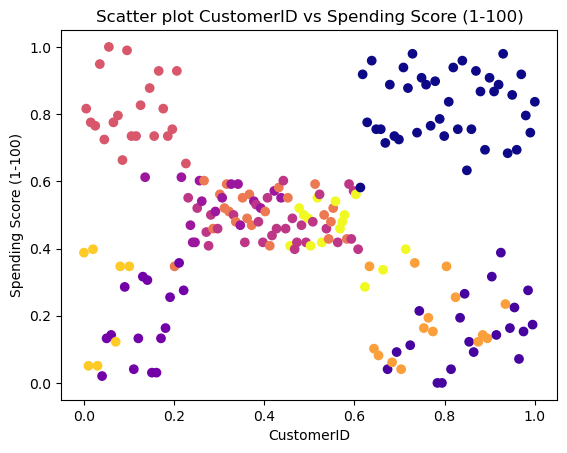

In [19]:
#Plotting
plt.title("Scatter plot CustomerID vs Spending Score (1-100)")
plt.scatter(scaled_df.iloc[:,0],scaled_df.iloc[:,3], c=agg_clust.labels_,cmap='plasma' )
plt.xlabel("CustomerID")
plt.ylabel("Spending Score (1-100)")
plt.show()

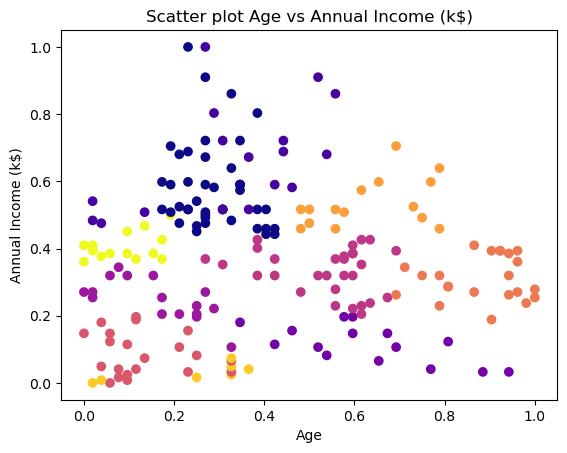

In [20]:
#Plotting
plt.title("Scatter plot Age vs Annual Income (k$)")
plt.scatter(scaled_df.iloc[:,1],scaled_df.iloc[:,2], c=agg_clust.labels_,cmap='plasma' )
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

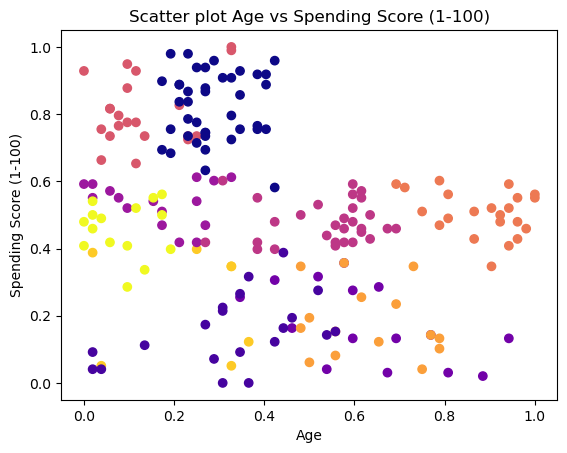

In [21]:
#Plotting
plt.title("Scatter plot Age vs Spending Score (1-100)")
plt.scatter(scaled_df.iloc[:,1],scaled_df.iloc[:,3], c=agg_clust.labels_,cmap='plasma' )
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

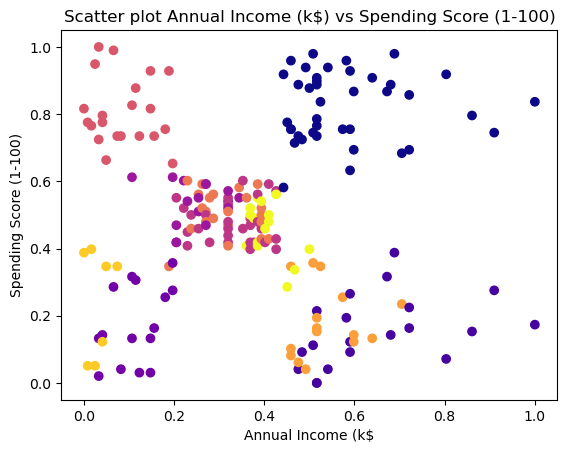

In [22]:
#Plotting
plt.title("Scatter plot Annual Income (k$) vs Spending Score (1-100)")
plt.scatter(scaled_df.iloc[:,2],scaled_df.iloc[:,3], c=agg_clust.labels_,cmap='plasma' )
plt.xlabel("Annual Income (k$")
plt.ylabel("Spending Score (1-100)")
plt.show()

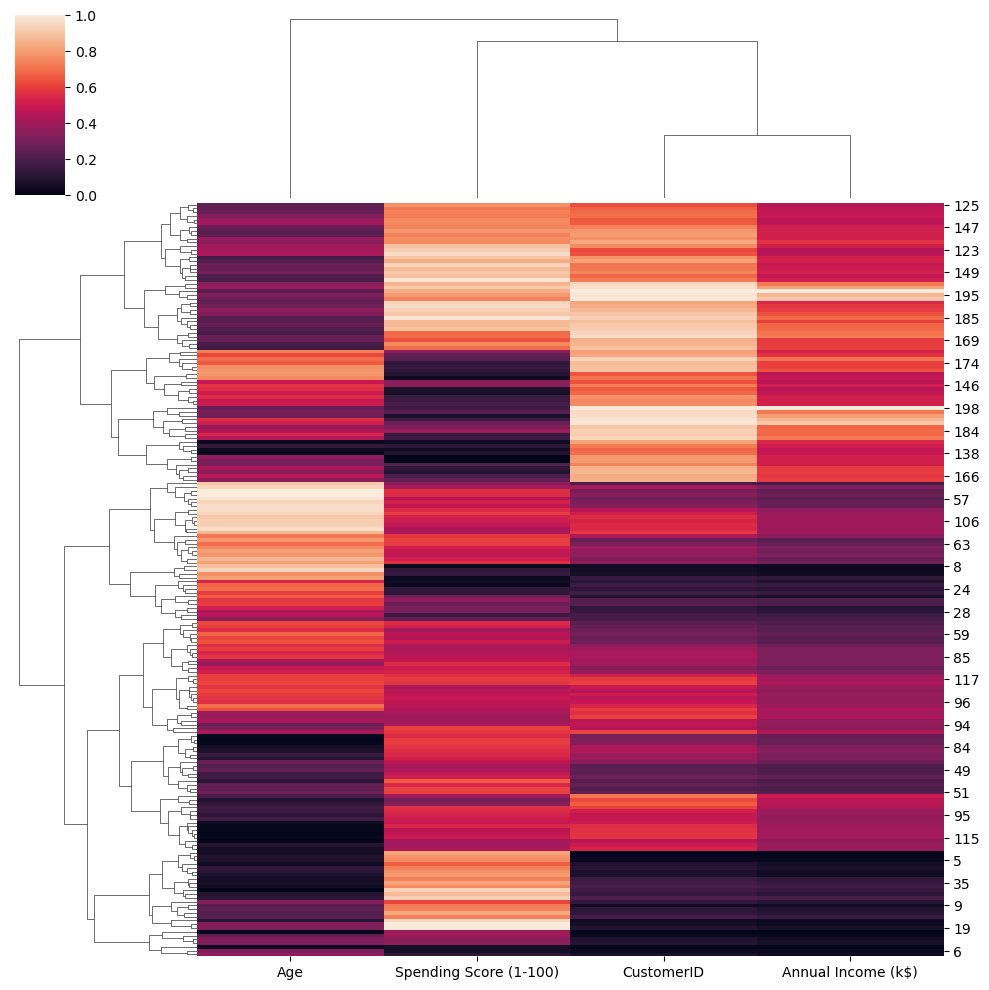

In [132]:
#HeatMap
sns.clustermap(scaled_df, method='complete',metric='euclidean')

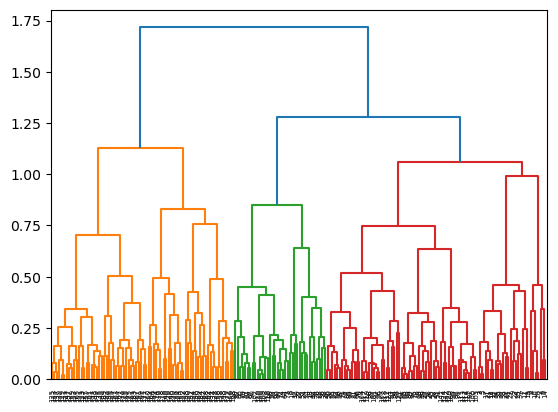

In [130]:
#plotting dendrogram
import scipy.cluster.hierarchy as sch
ddgram = sch.dendrogram((sch.linkage(scaled_df, method='complete')))
plt.show()